The woldbank_development_2015.csv file contains the World Development Indicators for the 2015 year, downloaded from The World Bank's [webpage](https://databank.worldbank.org/source/world-development-indicators).

<br></br>
<br></br>
<h1><center>Unsupervised learning & clustering</h1></center>

<h2><center>Benedek Dankó</h2></center>

In [212]:
import seaborn as sns
import pandas as pd
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**1. Reading data**

In [213]:
# read in table, set nan values:
df = pd.read_csv('woldbank_development_2015.csv', na_values= ['..', 'Nan'])

In [214]:
df.tail(8)
# looks like there are some empty/"fake" rows at the end:

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
379365,World,WLD,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,nan
379366,World,WLD,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,nan
379367,World,WLD,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,52.90000
379368,NaN,NaN,NaN,NaN,nan
379369,NaN,NaN,NaN,NaN,nan
379370,NaN,NaN,NaN,NaN,nan
379371,Data from database: World Development Indicators,NaN,NaN,NaN,nan
379372,Last Updated: 09/08/2020,NaN,NaN,NaN,nan


In [215]:
# keep only "normal" rows:
df = df.loc[0:379367]

In [216]:
df.tail(8)
# now it looks OK

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
379360,World,WLD,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,nan
379361,World,WLD,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,nan
379362,World,WLD,Women who believe a husband is justified in be...,SG.VAW.GOES.ZS,nan
379363,World,WLD,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,nan
379364,World,WLD,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,nan
379365,World,WLD,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,nan
379366,World,WLD,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,nan
379367,World,WLD,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,52.90000


In [217]:
df.isna().sum() # check number of missing values per variable
# 172946 measured features (2015 [YR2015] ) have nans

Country Name          0
Country Code          0
Series Name           0
Series Code           0
2015 [YR2015]    172946
dtype: int64

In [218]:
# check country/region names, number of names
Counter(df["Country Name"])

Counter({'Afghanistan': 1437,
         'Albania': 1437,
         'Algeria': 1437,
         'American Samoa': 1437,
         'Andorra': 1437,
         'Angola': 1437,
         'Antigua and Barbuda': 1437,
         'Argentina': 1437,
         'Armenia': 1437,
         'Aruba': 1437,
         'Australia': 1437,
         'Austria': 1437,
         'Azerbaijan': 1437,
         'Bahamas, The': 1437,
         'Bahrain': 1437,
         'Bangladesh': 1437,
         'Barbados': 1437,
         'Belarus': 1437,
         'Belgium': 1437,
         'Belize': 1437,
         'Benin': 1437,
         'Bermuda': 1437,
         'Bhutan': 1437,
         'Bolivia': 1437,
         'Bosnia and Herzegovina': 1437,
         'Botswana': 1437,
         'Brazil': 1437,
         'British Virgin Islands': 1437,
         'Brunei Darussalam': 1437,
         'Bulgaria': 1437,
         'Burkina Faso': 1437,
         'Burundi': 1437,
         'Cabo Verde': 1437,
         'Cambodia': 1437,
         'Cameroon': 1437,
       

In [219]:
df.loc[0:311829].tail()
# last row index with country, and not region: 311828

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
311825,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,14.50000
311826,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,3.70000
311827,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,32.40000
311828,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,59.40000
311829,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,nan


In [220]:
# pivote data frame (keep only countries)
# one row - one country, one column - one feature:
pivoted = df.loc[0:311828].pivot(index='Country Name', columns='Series Code', values='2015 [YR2015]')

In [221]:
pivoted.head()

Series Code,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,nan,590.06706,12.12582,379100.00000,58.06758,7765000.00000,0.22564,11.89382,2723762.00000,0.22210,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Albania,nan,nan,107.83125,11743.00049,42.85767,615099.97559,0.21352,22.44890,142600.00000,2.95620,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Algeria,nan,10.11800,23.36850,414563.98438,17.40593,7462100.09766,0.18783,3.13305,2686242.00000,0.41999,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
American Samoa,nan,nan,nan,49.00000,24.50000,3000.00000,0.05375,15.00000,nan,9.50000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Andorra,nan,nan,nan,188.09999,40.02128,810.00000,0.01038,1.72340,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [222]:
# format numbers (I don't prefer scientific notation in case of smaller numbers)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [223]:
pivoted.head()

Series Code,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,AG.LND.CROP.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,nan,590.06706,12.12582,379100.00000,58.06758,7765000.00000,0.22564,11.89382,2723762.00000,0.22210,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Albania,nan,nan,107.83125,11743.00049,42.85767,615099.97559,0.21352,22.44890,142600.00000,2.95620,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Algeria,nan,10.11800,23.36850,414563.98438,17.40593,7462100.09766,0.18783,3.13305,2686242.00000,0.41999,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
American Samoa,nan,nan,nan,49.00000,24.50000,3000.00000,0.05375,15.00000,nan,9.50000,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Andorra,nan,nan,nan,188.09999,40.02128,810.00000,0.01038,1.72340,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


**2. Data preprocessing and inspection**

Visualizing missing values (Seaborn/Matplotlib):

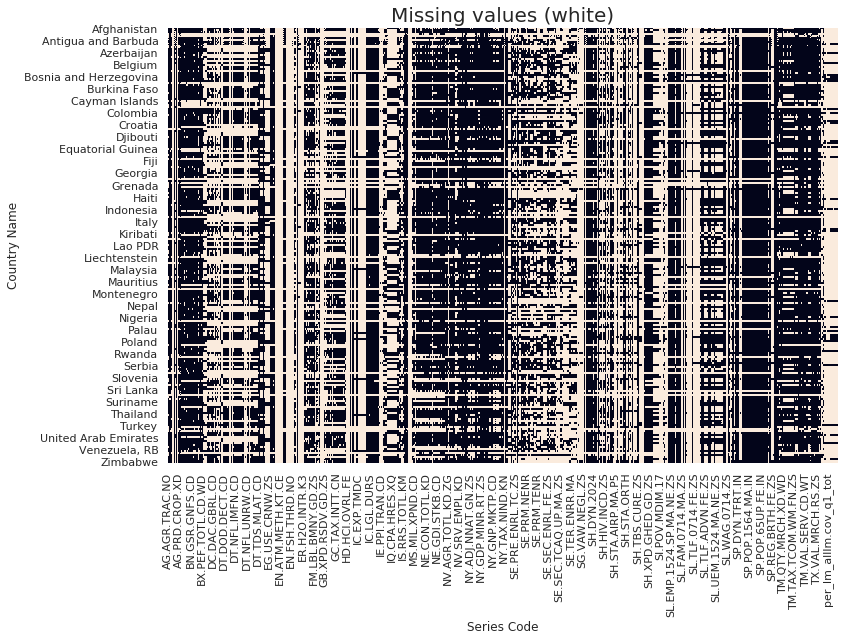

In [224]:
sns.set(font_scale=1)
plt.figure(figsize=(12, 8))
sns.heatmap(pivoted.isnull(), cbar=False)
plt.title('Missing values (white)', fontsize=20)
plt.show()
# not all variable/country is visible
# but the pattern is clear

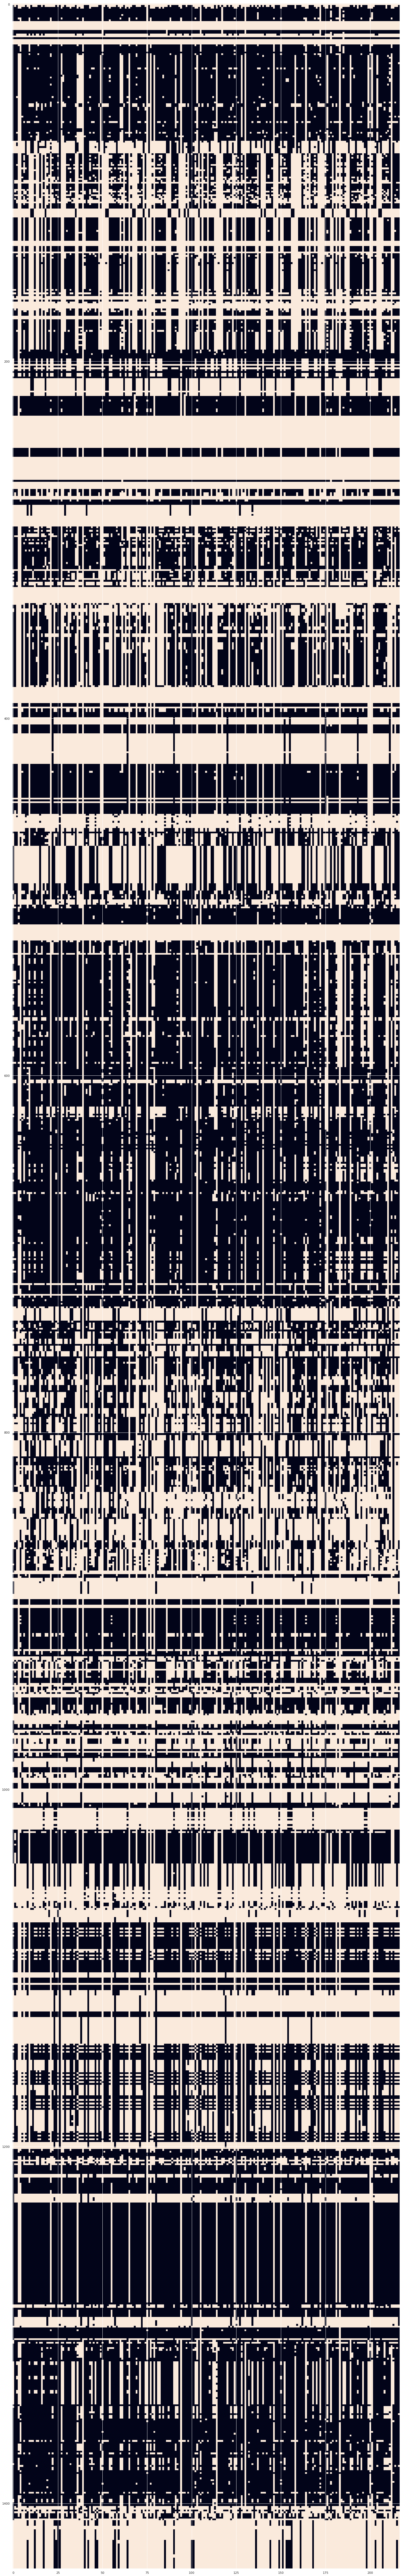

In [225]:
plt.figure(figsize=(25, 200))
plt.imshow(pivoted.isna().T) # visualize nan values per variable
plt.show()
# rows: variables
# columns: countries
# white: nan, black: normal values

Calculate missing values:

In [226]:
# dataframe containing each feature with the number of missing values in it:
features_missing = pivoted.isna().sum().to_frame()

In [227]:
# dataframe containing each country/region (row) with the number of missing values in it:
countries_missing = pivoted.T.isna().sum().to_frame()

In [228]:
# select features with less than 20 nans:
selected_features = features_missing[features_missing[0] < 20].index.to_list()

In [229]:
# select rows with less than 700 nans:
selected_countries = countries_missing[countries_missing[0] < 700].index.to_list()

In [230]:
# select final dataframe based on the previously filtered rows/columns
df_filtered = pivoted[[c for c in pivoted.columns if c in selected_features]] # filter columns
df_filtered = df_filtered[df_filtered.index.isin(selected_countries)] # filter rows

In [231]:
df_filtered.tail()

Series Code,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.FRST.K2,AG.LND.FRST.ZS,AG.LND.TOTL.K2,AG.PRD.CROP.XD,AG.PRD.FOOD.XD,...,TX.VAL.MRCH.HI.ZS,TX.VAL.MRCH.OR.ZS,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.R2.ZS,TX.VAL.MRCH.R3.ZS,TX.VAL.MRCH.R5.ZS,TX.VAL.MRCH.R6.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD,TX.VAL.MRCH.XD.WD
Country Name,,,,,,,,,,,,,,,,,,,,,
Vanuatu,1870.00000,15.34044,20000.00000,0.07377,1.64069,4400.00000,36.09516,12190.00000,126.57000,122.86000,...,62.26534,15.46733,22.26733,0.28928,14.49238,0.08974,0.48214,0.00000,66155726.00000,149.41154
Vietnam,121720.00000,39.25565,6998000.00000,0.07551,22.56910,147730.00000,47.64408,310070.00000,138.05000,138.67000,...,70.97457,9.22280,19.80232,2.08877,2.72245,2.30041,1.41167,0.00031,159804000000.00000,1118.99920
West Bank and Gaza,2969.20013,49.32226,50819.99969,0.01190,8.44186,91.70000,1.52326,6020.00000,86.79000,87.64000,...,92.75482,0.54111,0.10938,0.40941,nan,0.00213,0.02020,0.00000,957635940.00000,282.32323
Zambia,238360.00000,32.06392,3800000.00000,0.23930,5.11172,486350.00000,65.42326,743390.00000,170.19000,180.40000,...,59.13669,15.26497,14.84751,0.01300,0.05722,0.32593,24.12466,1.47368,7039254441.00000,740.34002
Zimbabwe,162000.00000,41.87670,4000000.00000,0.28955,10.33993,140620.00000,36.35001,386850.00000,89.61000,83.42000,...,7.28643,0.19556,0.17040,0.00681,0.00304,0.00739,92.51734,0.00067,2679512535.00000,168.73972


Visualize nans after filtering data:

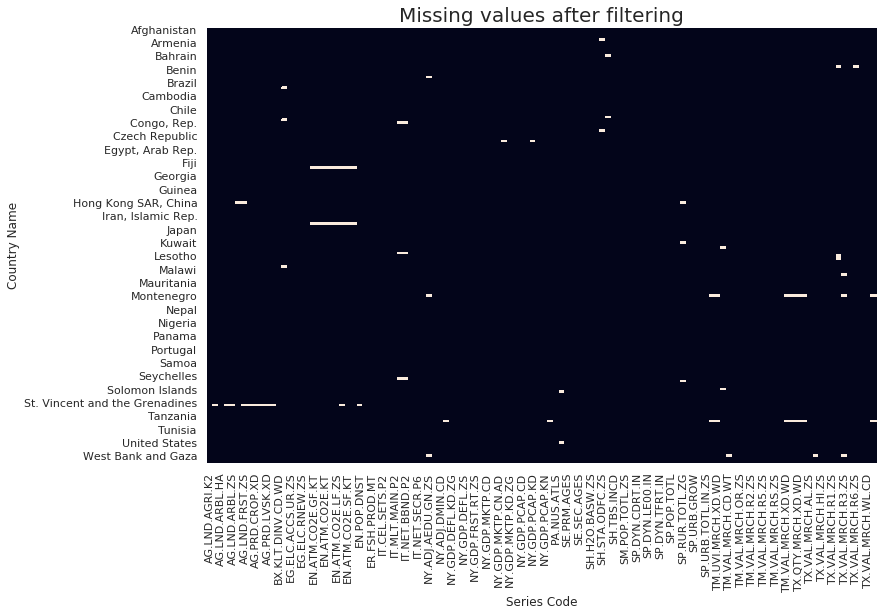

In [232]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.isnull(), cbar=False)
plt.title('Missing values after filtering', fontsize=20)
plt.show()
# not all variable/country is visible
# much less white bands, less nans

In [233]:
# fill nans with the mean values of that given column:
df_filtered = df_filtered.fillna(df_filtered.mean())

In [234]:
df_filtered.shape
# 116 countries, 163 features

(163, 116)

In [235]:
# series name - code pairs:
df.iloc[:, 2:4].head()

,Series Name,Series Code
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS
1,Access to electricity (% of population),EG.ELC.ACCS.ZS
2,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS
3,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS
4,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS


Based on this:
Hungary seems similar to Slovakia or Romania, Norway seems similar to Germany or Denmark.

**3. PCA**

Create model, fit data:

In [236]:
%%time
n = 3
pca = PCA(n_components=n, random_state=10)
pca_transformed = pca.fit_transform(df_filtered)
print('{}% of the variance is explained by the first {} components\n'.format(round(pca.explained_variance_ratio_.cumsum()[2]*100, 5), n))

100.0% of the variance is explained by the first 3 components

CPU times: user 195 ms, sys: 26.7 ms, total: 222 ms
Wall time: 22.3 ms


In [237]:
# create dataframe for plotting:
df_pca = pd.DataFrame(list(zip(pca_transformed[:,0], pca_transformed[:,1], pca_transformed[:,2])), 
               columns =['pca0', 'pca1', 'pca2']) 

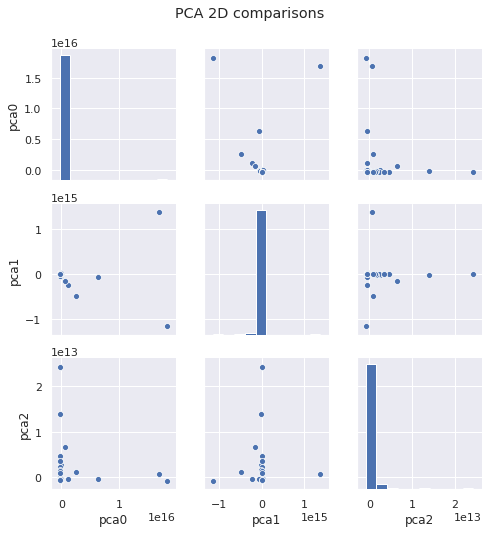

In [238]:
# create pairplots of the 3 components:
g = sns.pairplot(df_pca)
g.fig.set_size_inches(7,7)
g.fig.suptitle("PCA 2D comparisons", y=1.05)
plt.show()

It does not look good, because of the different scales (eg. 0 - 2.5 Vs. 0 - 1 * 1e16).

Create model, fit data after normalization, using sklearn MinMaxScaler for normalization:

In [239]:
transformer = MinMaxScaler().fit(df_filtered) # setting up normalizer
tr = transformer.transform(df_filtered) # transform data
pca_transformed_norm = pca.fit_transform(tr)

df_pca_norm = pd.DataFrame(list(zip(pca_transformed_norm[:,0], 
                                    pca_transformed_norm[:,1], 
                                    pca_transformed_norm[:,2])), 
               columns =['pca0', 'pca1', 'pca2'])

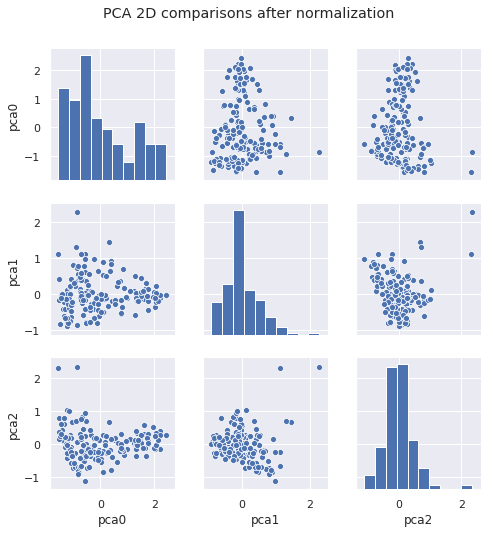

In [240]:
# create pairplots of the 3 normalized components:
g = sns.pairplot(df_pca_norm)
g.fig.set_size_inches(7,7)
g.fig.suptitle("PCA 2D comparisons after normalization", y=1.05)
plt.show()

Now it looks much better, points are separated clearly.

Just to check a few rows of the PCA-transformed data (with the countries labelled):

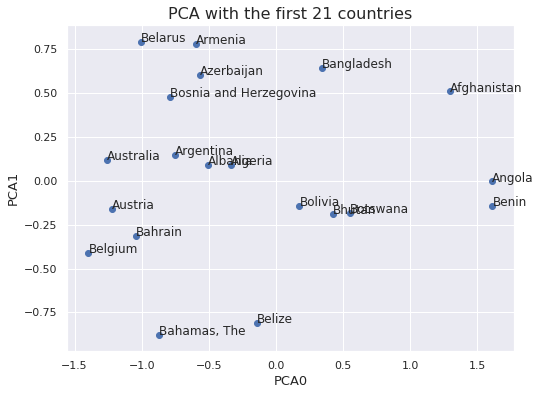

In [241]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(pca_transformed_norm[:,0][0:20], pca_transformed_norm[:,1][0:20])
ax.axes.set_title("PCA with the first 21 countries",fontsize=16)
ax.set_xlabel("PCA0",fontsize=13)
ax.set_ylabel("PCA1",fontsize=13)

for i, txt in enumerate(df_filtered.index.to_list()[0:20]):
    ax.annotate(txt, (pca_transformed_norm[:,0][i], pca_transformed_norm[:,1][i]))
plt.show()

PCA with all countries (Hungary: red, Norway: orange):

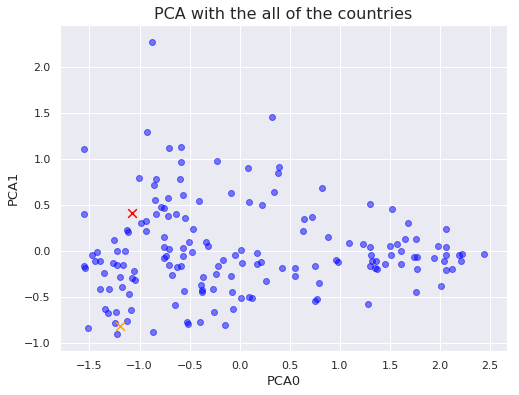

In [242]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.axes.set_title("PCA with the all of the countries",fontsize=16)
ax.set_xlabel("PCA0",fontsize=13)
ax.set_ylabel("PCA1",fontsize=13)
for i, j in enumerate(pca_transformed_norm[:,0]):
    if df_filtered.index.to_list()[i] == 'Hungary':
        plt.scatter(pca_transformed_norm[:,0][i] , pca_transformed_norm[:,1][i], color='red', alpha=1, marker='x', s=75)
    elif df_filtered.index.to_list()[i] == 'Norway':
        plt.scatter(pca_transformed_norm[:,0][i] , pca_transformed_norm[:,1][i], color='orange', alpha=1, marker='x', s=75)
    else:
        plt.scatter(pca_transformed_norm[:,0][i] , pca_transformed_norm[:,1][i], color='blue', alpha=0.5)
plt.show()

**4. t-SNE**

In [243]:
# importance of random states
# set up TSNE
tsne = TSNE(random_state = 11)

In [244]:
%%time
# measuring time
# fit model to the the normalized data:
embedded = tsne.fit_transform(tr)

CPU times: user 3.51 s, sys: 1.14 s, total: 4.65 s
Wall time: 3.26 s


In [245]:
# embedded data has 2 components, 163 points (countries)
shape(embedded)

(163, 2)

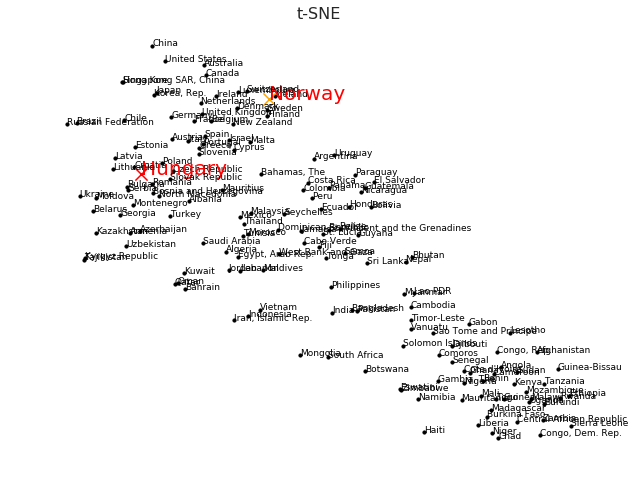

In [246]:
# plot the data:
fig, ax = plt.subplots(figsize=(10, 8))
ax.axes.set_title("t-SNE",fontsize=16)
for i, j in enumerate(embedded[:,0]):
    if df_filtered.index.to_list()[i] == 'Hungary':
        plt.scatter(embedded[:,0][i] , embedded[:,1][i], c='red', s=150, marker='x')
    elif df_filtered.index.to_list()[i] == 'Norway':
        plt.scatter(embedded[:,0][i] , embedded[:,1][i], c='orange', s=150, marker='x')
    else:
        plt.scatter(embedded[:,0][i] , embedded[:,1][i], c='black', s=10)

for i, txt in enumerate(df_filtered.index.to_list()):
    if txt == 'Hungary' or txt == 'Norway':
        ax.annotate(txt, (embedded[:,0][i], embedded[:,1][i]), color='red', size=20)
    else:
        ax.annotate(txt, (embedded[:,0][i], embedded[:,1][i]), color='black', size=9)
plt.axis('off')
plt.show()

The closest ones to Norway: Sweden, Switzerland, Finland, Denmark
<br> and to Hungary: Bulgaria, Slovakia, Poland, Romania

**5. Hierarchical clustering**

From the Seaborn manual: d = Rectangular data for clustering. **Cannot contain NAs.**

In [247]:
df_clean = df_filtered.fillna(df_filtered.mean()) # fill nans with column mean
tr_2 = transformer.transform(df_clean) # normalize data, otherwise would be difficult to visualize

In [248]:
# create dataframe for clustering, from the normalized data:
df_clust = pd.DataFrame(data=tr_2[0:,0:],    # values
                        index=df_clean.index.to_list(),    
                        columns=tr_2[0,0:]) 
df_clust.columns = list(df_clean) # set column names (features)

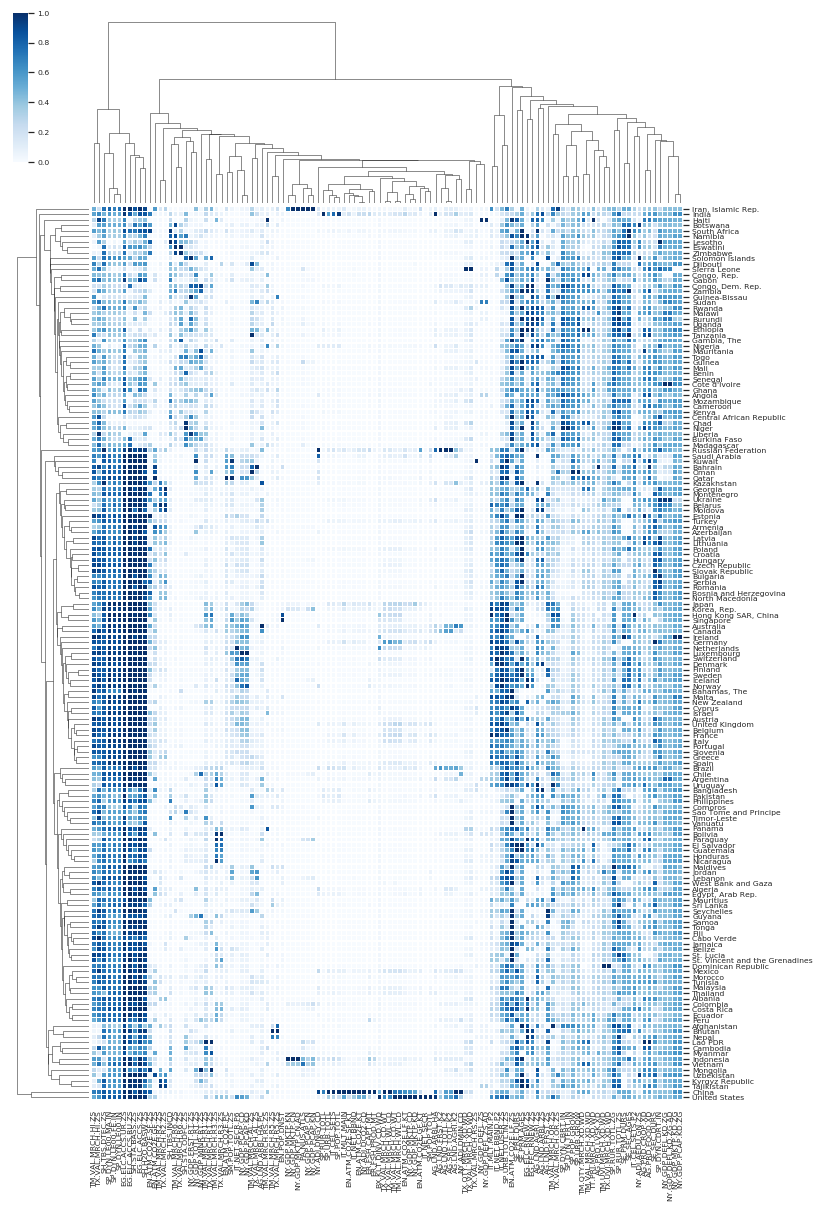

In [249]:
# Plot the data:
sns.set(font_scale=0.7)
h=sns.clustermap(df_clust, cmap="Blues", 
                 linewidth=.5, method="average", 
                 annot=False, figsize=(12, 20), 
                 yticklabels=1, xticklabels=1)
plt.show()

Here, Hungary clusters with Czech Republic, Croatia, Poland, and Slovakia, similarly to the previosuly shown methods. <br>
In this case, the clusters of the features are also indicated (at the top) which can be useful too. <br>
Rows with similar patterns: similar countries (described by these features), columns with similar patterns: similar features. <br>
Also, interesting to see, how China and the USA is separated from the other clusters (see at the bottom).